In [10]:
import pandas as pd

# Step 1: Load the CSV file
file_path = 'BSE_data.csv'  # Ensure that the CSV file is in the correct location
data = pd.read_csv(file_path)

# Step 2: Check if data is loaded correctly by displaying the first few rows
print(data.head())


        Month   Close
0  1980-01-01  123.54
1  1980-02-01  128.21
2  1980-03-01  128.57
3  1980-04-01  127.25
4  1980-05-01  125.97


In [11]:
missing_value = data.isnull().sum()
print(missing_value)

Month    0
Close    0
dtype: int64


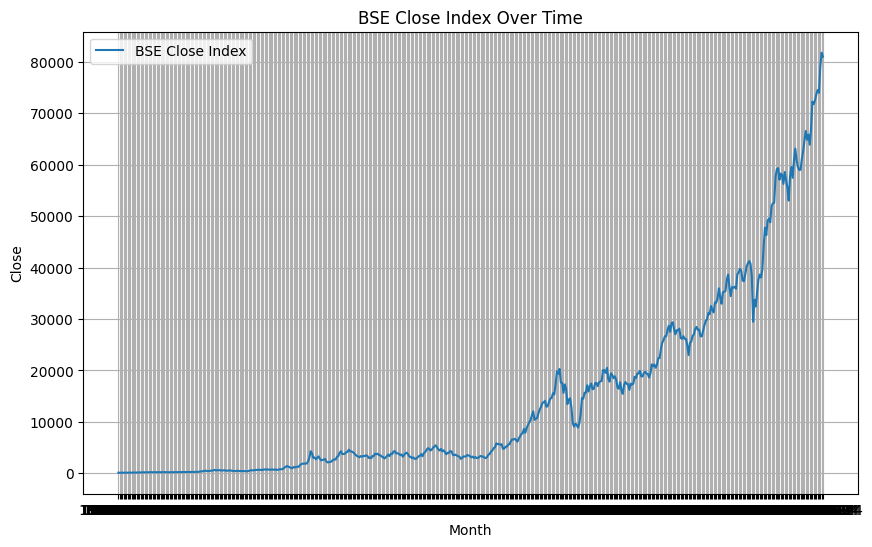

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(data['Month'], data['Close'], label='BSE Close Index')
plt.xlabel('Month')
plt.ylabel('Close')
plt.title('BSE Close Index Over Time')
plt.grid(True)
plt.legend()
plt.show()


In [13]:
epsilon = float(input("Enter a value for epsilon (0 < epsilon <= 1): "))

Enter a value for epsilon (0 < epsilon <= 1):  0.05


In [19]:
z = []  # List to store the labels (Down, Flat, Rise)
for i in range(len(data) - 1):
    x_current = data['Close'].iloc[i]
    x_next = data['Close'].iloc[i + 1]
    
    # Calculate d(i) 
    d = 2 * (x_next - x_current) / (x_next + x_current)
    
    # Classify based on epsilon
    if d < -epsilon:
        z.append('Down')
    elif -epsilon <= d <= epsilon:
        z.append('Flat')
    else:
        z.append('Rise')


In [20]:
from collections import Counter

# Get the first 500 z(i) values
z_500 = z[:500]

# Create bigrams (pair of consecutive z(i))
bigrams = [(z_500[i], z_500[i+1]) for i in range(len(z_500)-1)]

# Count the occurrences of each bigram
bigram_counts = Counter(bigrams)

# Calculate conditional probabilities
conditional_probs = {}
total_bigrams = sum(bigram_counts.values())

for (prev, next), count in bigram_counts.items():
    if prev not in conditional_probs:
        conditional_probs[prev] = {}
    # Calculate conditional probability by dividing the count of (prev -> next) by total_bigrams
    conditional_probs[prev][next] = count / total_bigrams



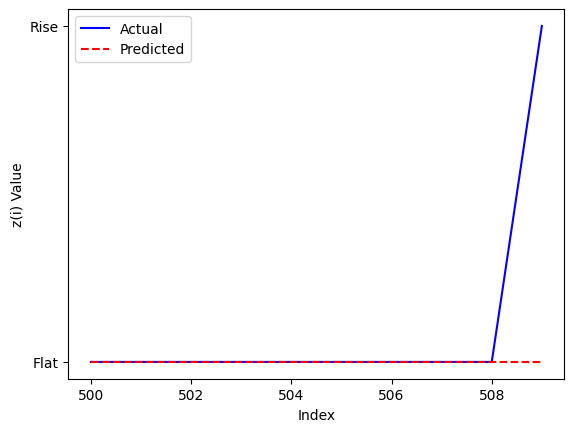

In [21]:
predictions = []
for i in range(500, 510):
    previous = z[i-1]  # Get the previous z(i)
    next_prediction = max(conditional_probs[previous], key=conditional_probs[previous].get)  # Predict the next z(i)
    predictions.append(next_prediction)

# Actual values for comparison
actual_values = z[500:510]

# Plot the predicted vs actual values
plt.plot(range(500, 510), actual_values, label='Actual', linestyle='-', color='b')
plt.plot(range(500, 510), predictions, label='Predicted', linestyle='--', color='r')
plt.xlabel('Index')
plt.ylabel('z(i) Value')
plt.legend()
plt.show()


In [22]:
# Calculate accuracy
correct_predictions = sum([1 for i in range(len(predictions)) if predictions[i] == actual_values[i]])
accuracy = correct_predictions / len(predictions) * 100
print(f'Prediction Accuracy: {accuracy:.2f}%')


Prediction Accuracy: 90.00%


In [23]:
from collections import Counter

# Create trigrams
trigrams = [(z_500[i], z_500[i+1], z_500[i+2]) for i in range(len(z_500)-2)]

# Count occurrences of trigrams and calculate trigram probabilities
trigram_counts = Counter(trigrams)

# Calculate the total number of occurrences for each (first, second) pair
pair_counts = Counter((first, second) for first, second, third in trigrams)

# Calculate trigram probabilities
trigram_probs = {}
for (first, second, third), count in trigram_counts.items():
    if (first, second) not in trigram_probs:
        trigram_probs[(first, second)] = {}
    trigram_probs[(first, second)][third] = count / pair_counts[(first, second)]

# Predict using trigram model
trigram_predictions = []
for i in range(500, 510):
    prev1 = z[i-2]  # Get two previous values
    prev2 = z[i-1]
    
    # Predict next z(i)
    if (prev1, prev2) in trigram_probs:
        next_prediction = max(trigram_probs[(prev1, prev2)], key=trigram_probs[(prev1, prev2)].get)
    else:
        next_prediction = 'Flat'  # Fallback prediction if no trigram exists
    
    trigram_predictions.append(next_prediction)

# Calculate trigram prediction accuracy
correct_trigram_predictions = sum([1 for i in range(len(trigram_predictions)) if trigram_predictions[i] == actual_values[i]])
trigram_accuracy = correct_trigram_predictions / len(trigram_predictions) * 100
print(f'Trigram Prediction Accuracy: {trigram_accuracy:.2f}%')


Trigram Prediction Accuracy: 90.00%
